In [1]:
pip install pandas numpy matplotlib seaborn missingno patsy


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: EDA and Data Cleaning

In [3]:
# Load the dataset
file_path = "Life_Expectancy_Data.csv"  # Update with actual file path
df = pd.read_csv(file_path)

# Checking column names
#print("\nColumn Names Before Renaming:", df.columns)
# Renaming columns: strip spaces, replace inner spaces with underscores, convert to lowercase
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

print("\nColumn Names After Renaming:", df.columns)



Column Names After Renaming: Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')


In [242]:
# Display first few rows
#print(df.sample(5))

# Basic information about dataset
#print("\nDataset Info:")
#print(df.info())

In [4]:
# Check unique countries
unique_countries = df["country"].unique()
print(f"\nTotal Unique Countries: {len(unique_countries)}")
#print("Sample Countries:", unique_countries[:5])  # Display first 10 for preview

# Check unique status values
unique_status = df["status"].unique()
print("\nUnique Status Values:", unique_status)


Total Unique Countries: 193

Unique Status Values: ['Developing' 'Developed']


In [5]:
# Count the number of records per country
country_counts = df.groupby("country").size().reset_index(name="num_records")

# Display sorted results (highest to lowest)
country_counts_sorted = country_counts.sort_values(by="num_records", ascending=False)

# Show top 10 countries
#print("\nTop 10 Countries with Most Records:")
#print(country_counts_sorted.head(5))

# Show bottom 10 countries
#print("\nBottom 10 Countries with Least Records:")
#print(country_counts_sorted.tail(5))

# Visualize country distribution
#plt.figure(figsize=(12, 5))
#sns.histplot(country_counts["num_records"], bins=20, kde=True, color="blue")
#plt.xlabel("Number of Records per Country")
#plt.ylabel("Frequency")
#plt.title("Distribution of Data Points per Country")
#plt.show()


In [6]:
# Count the number of records per country
country_counts = df.groupby("country").size().reset_index(name="num_records")

# Check how many countries have exactly 16 data points
num_countries_16 = country_counts[country_counts["num_records"] == 16].shape[0]

print(f"\nNumber of countries with exactly 16 data points: {num_countries_16}")

# Check general distribution
print("\nSummary of Records Per Country:")
print(country_counts["num_records"].value_counts().sort_index())



Number of countries with exactly 16 data points: 183

Summary of Records Per Country:
num_records
1      10
16    183
Name: count, dtype: int64


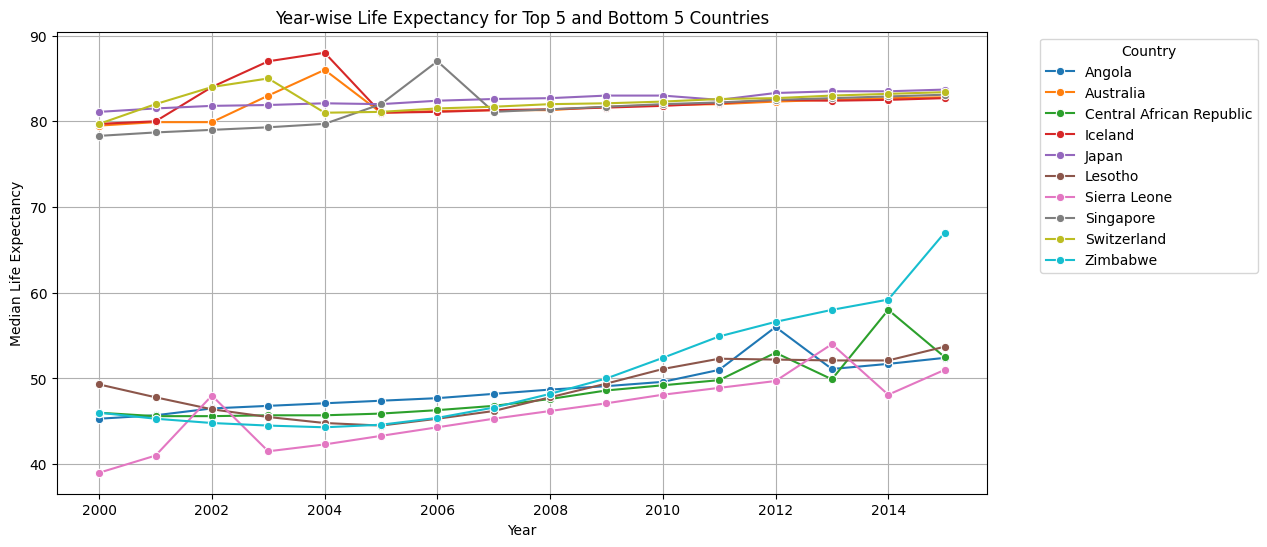

In [7]:
# Group by country and compute median life expectancy
country_median_life_exp = df.groupby("country")["life_expectancy"].median().reset_index()

# Get the top 5 and bottom 5 countries based on life expectancy
top_5_countries = country_median_life_exp.nlargest(5, "life_expectancy")["country"]
bottom_5_countries = country_median_life_exp.nsmallest(5, "life_expectancy")["country"]

# Filter dataset for the selected countries
filtered_df = df[df["country"].isin(top_5_countries) | df["country"].isin(bottom_5_countries)]

# Compute year-wise median life expectancy for top and bottom countries
yearly_life_expectancy = filtered_df.groupby(["year", "country"])["life_expectancy"].median().reset_index()

# Plot year-wise trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_life_expectancy, x="year", y="life_expectancy", hue="country", marker="o", palette="tab10")
plt.title("Year-wise Life Expectancy for Top 5 and Bottom 5 Countries")
plt.xlabel("Year")
plt.ylabel("Median Life Expectancy")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

In [8]:
# Group by country and status, then calculate the median life expectancy
country_median_life_exp = df.groupby(["country", "status"])["life_expectancy"].median().reset_index()

# Get the top 5 countries with highest life expectancy
top_5_countries = country_median_life_exp.nlargest(5, "life_expectancy")

# Get the bottom 5 countries with lowest life expectancy
bottom_5_countries = country_median_life_exp.nsmallest(5, "life_expectancy")

# Combine top and bottom 5 results
top_bottom_countries = pd.concat([top_5_countries, bottom_5_countries])

# Display results
#print("\nTop 5 Countries by Life Expectancy:")
#print(top_5_countries)

#print("\nBottom 5 Countries by Life Expectancy:")
#print(bottom_5_countries)

In [9]:
# Important features based on feature selection
important_features = [
    "adult_mortality", "infant_deaths", "hiv/aids", "bmi", 
    "gdp", "schooling", "income_composition_of_resources"
]

# Group by country, then calculate the median life expectancy
country_median_life_exp = df.groupby("country")["life_expectancy"].median().reset_index()

# Get the top 5 countries with highest life expectancy
top_5_countries = country_median_life_exp.nlargest(5, "life_expectancy")

# Get the bottom 5 countries with lowest life expectancy
bottom_5_countries = country_median_life_exp.nsmallest(5, "life_expectancy")

# Combine top and bottom 5 countries
selected_countries = pd.concat([top_5_countries, bottom_5_countries])

# Compute the median values of selected important features for these countries
median_features_top_bottom = df.groupby("country")[important_features].median().reset_index()

# Merge with life expectancy data to keep only the selected countries
final_median_data = selected_countries.merge(median_features_top_bottom, on="country")

# Display the results
print("\nMedian Values of Important Features for Top 5 and Bottom 5 Countries by Life Expectancy:")
print(final_median_data)


Median Values of Important Features for Top 5 and Bottom 5 Countries by Life Expectancy:
                    country  life_expectancy  adult_mortality  infant_deaths  \
0                     Japan            82.55             64.0            3.0   
1               Switzerland            82.20             60.0            0.0   
2                   Iceland            81.95             56.5            0.0   
3                 Singapore            81.85             64.5            0.0   
4                 Australia            81.80             66.0            1.0   
5              Sierra Leone            46.65            428.5           29.0   
6  Central African Republic            47.20            441.0           17.0   
7                  Zimbabwe            47.40            495.5           26.5   
8                    Angola            48.45            367.0           85.5   
9                   Lesotho            48.55            576.0            4.5   

   hiv/aids    bmi           

In [10]:
# Convert "Status" to binary encoding
df["status"] = df["status"].map({"Developing": 0, "Developed": 1})

# Drop the "Country" column
df.drop(columns=["country"], inplace=True)


In [250]:
# Summary statistics
#print("\nSummary Statistics:")
#print(df.describe())

In [11]:
# Checking missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64


After checking feature importance missing value is handled

In [12]:
# Handling missing values by imputing with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Verify if missing values are handled
#print("\nMissing Values After Imputation:")
#print(df.isnull().sum())

In [13]:
# Checking for duplicate rows
print("\nDuplicate Rows: ", df.duplicated().sum())
# Removing duplicate rows if any
df = df.drop_duplicates()


Duplicate Rows:  0


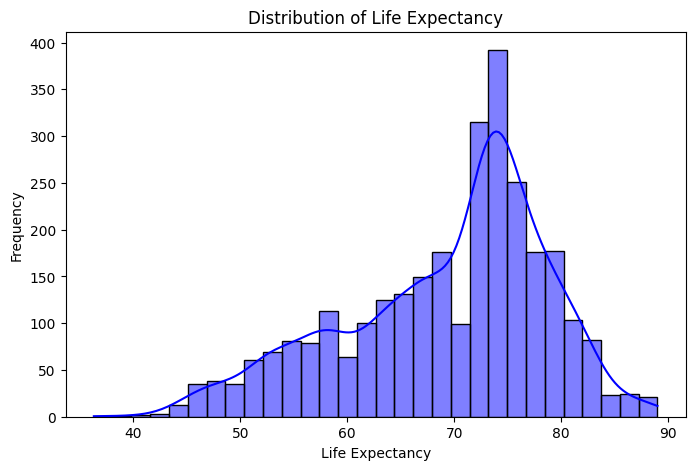

In [14]:
# Distribution of Life Expectancy
plt.figure(figsize=(8, 5))
sns.histplot(df["life_expectancy"], bins=30, kde=True, color="blue")
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.show()

In [15]:
#histograms
numerical_columns =  ['life_expectancy', 'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling']

plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)
    plt.hist(df[col])
    plt.title(col)
    plt.xlabel(' ')

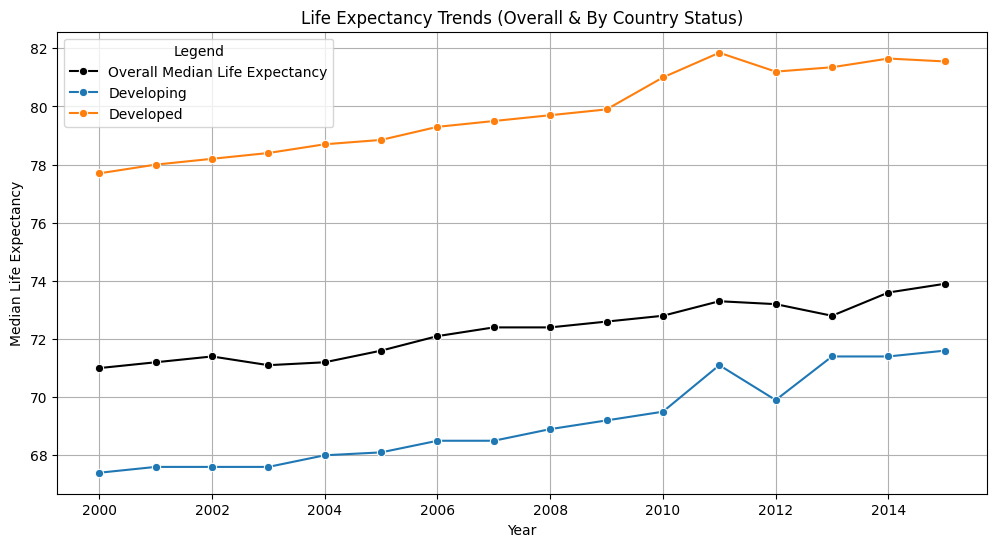

In [16]:
# Compute median life expectancy per year
yearly_life_expectancy = df.groupby("year")["life_expectancy"].median().reset_index()

# Compute median life expectancy by year and status
status_trend = df.groupby(["year", "status"])["life_expectancy"].median().reset_index()

# Replace status values for the legend
status_trend["status"] = status_trend["status"].replace({0: "Developing", 1: "Developed"})


# Plot both trends in one figure
plt.figure(figsize=(12, 6))

# Plot overall median trend
sns.lineplot(x=yearly_life_expectancy["year"], y=yearly_life_expectancy["life_expectancy"], 
             marker="o", color="black", label="Overall Median Life Expectancy")

# Plot life expectancy trends by status
sns.lineplot(data=status_trend, x="year", y="life_expectancy", hue="status", marker="o")

# Formatting the plot
plt.title("Life Expectancy Trends (Overall & By Country Status)")
plt.xlabel("Year")
plt.ylabel("Median Life Expectancy")
plt.legend(title="Legend")
plt.grid(True)

# Show the plot
plt.show()

In [17]:
# Drop the "Year" column
df.drop(columns=["year"], inplace=True)

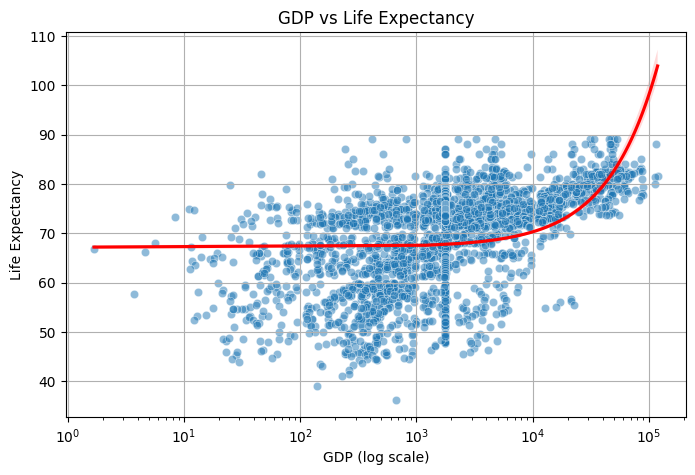

In [18]:
# Scatter plot of GDP vs Life Expectancy
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["gdp"], y=df["life_expectancy"], alpha=0.5)
sns.regplot(x=df["gdp"], y=df["life_expectancy"], scatter=False, color="red")
plt.xscale("log")  # Log scale for better visualization
plt.title("GDP vs Life Expectancy")
plt.xlabel("GDP (log scale)")
plt.ylabel("Life Expectancy")
plt.grid(True)
plt.show()

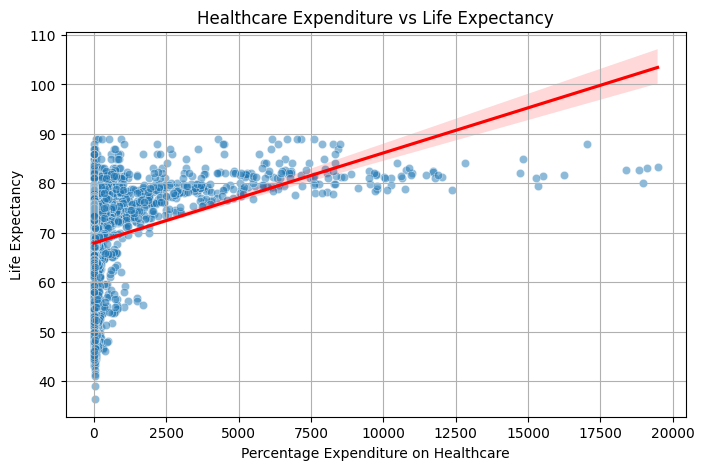

In [19]:
# Scatter plot of Healthcare Expenditure vs Life Expectancy
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["percentage_expenditure"], y=df["life_expectancy"], alpha=0.5)
sns.regplot(x=df["percentage_expenditure"], y=df["life_expectancy"], scatter=False, color="red")
plt.title("Healthcare Expenditure vs Life Expectancy")
plt.xlabel("Percentage Expenditure on Healthcare")
plt.ylabel("Life Expectancy")
plt.grid(True)
plt.show()

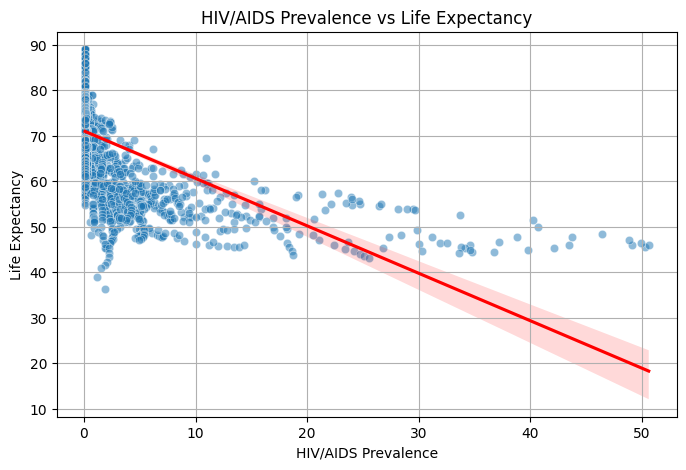

In [20]:
# Scatter plot of HIV/AIDS prevalence vs Life Expectancy
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["hiv/aids"], y=df["life_expectancy"], alpha=0.5)
sns.regplot(x=df["hiv/aids"], y=df["life_expectancy"], scatter=False, color="red")
plt.title("HIV/AIDS Prevalence vs Life Expectancy")
plt.xlabel("HIV/AIDS Prevalence")
plt.ylabel("Life Expectancy")
plt.grid(True)
plt.show()

In [21]:
# Boxplots for numerical variables to detect outliers
#plt.figure(figsize=(12, 6))
#sns.boxplot(data=df.select_dtypes(include=['number']))
#plt.xticks(rotation=90)
#plt.title("Boxplot of Numerical Features")
#plt.show()

In [22]:
from scipy.stats import zscore

# Compute Z-scores for numeric columns
z_scores = df.select_dtypes(include=['number']).apply(zscore)

# Find outliers (Z-score > 3)
outliers = (z_scores > 3) | (z_scores < -3)

# Count outliers per column
outlier_counts = outliers.sum()
print("\nOutlier Counts per Column (Z-score method):")
print(outlier_counts)

# Visualizing Z-score Outliers
#plt.figure(figsize=(12, 6))
#sns.heatmap(outliers, cmap="coolwarm", cbar=False, yticklabels=False)
#plt.title("Z-score Outlier Heatmap")
#plt.show()



Outlier Counts per Column (Z-score method):
status                               0
life_expectancy                      2
adult_mortality                     40
infant_deaths                       37
alcohol                              5
percentage_expenditure              84
hepatitis_b                        168
measles                             48
bmi                                  0
under-five_deaths                   34
polio                              172
total_expenditure                   27
diphtheria                         170
hiv/aids                            69
gdp                                 96
population                          24
thinness__1-19_years                54
thinness_5-9_years                  57
income_composition_of_resources    130
schooling                           28
dtype: int64


## Step 2: Feature Selection

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns (excluding categorical & target variable)
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_cols.remove('life_expectancy')  # Ensure target variable is not scaled
df_original = df.copy()
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform numerical features
df[num_cols] = scaler.fit_transform(df[num_cols])

print("\nData Normalization Applied: Features scaled between 0 and 1.")


Data Normalization Applied: Features scaled between 0 and 1.


In [24]:
# Sample some original vs normalized values
sample_indices = [0, 5, 10]  # Choose any row indices for comparison

for col in num_cols[:10]:  # Checking first 5 numerical columns
    print(f"\nFeature: {col}")
    print("Original:", df_original.loc[sample_indices, col].values)
    print("Normalized:", df.loc[sample_indices, col].values)



Feature: status
Original: [0 0 0]
Normalized: [0. 0. 0.]

Feature: adult_mortality
Original: [263. 279. 291.]
Normalized: [0.36288089 0.38504155 0.40166205]

Feature: infant_deaths
Original: [62 74 85]
Normalized: [0.03444444 0.04111111 0.04722222]

Feature: alcohol
Original: [0.01 0.01 0.02]
Normalized: [0.         0.         0.00055991]

Feature: percentage_expenditure
Original: [71.27962362 79.67936736  1.38864773]
Normalized: [3.65913486e-03 4.09033516e-03 7.12861413e-05]

Feature: hepatitis_b
Original: [65. 66. 66.]
Normalized: [0.65306122 0.66326531 0.66326531]

Feature: measles
Original: [1154 1989 1296]
Normalized: [0.0054387  0.00937398 0.00610794]

Feature: bmi
Original: [19.1 16.7 14.2]
Normalized: [0.20973349 0.18192352 0.15295481]

Feature: under-five_deaths
Original: [ 83 102 118]
Normalized: [0.0332 0.0408 0.0472]

Feature: polio
Original: [ 6. 66. 58.]
Normalized: [0.03125    0.65625    0.57291667]


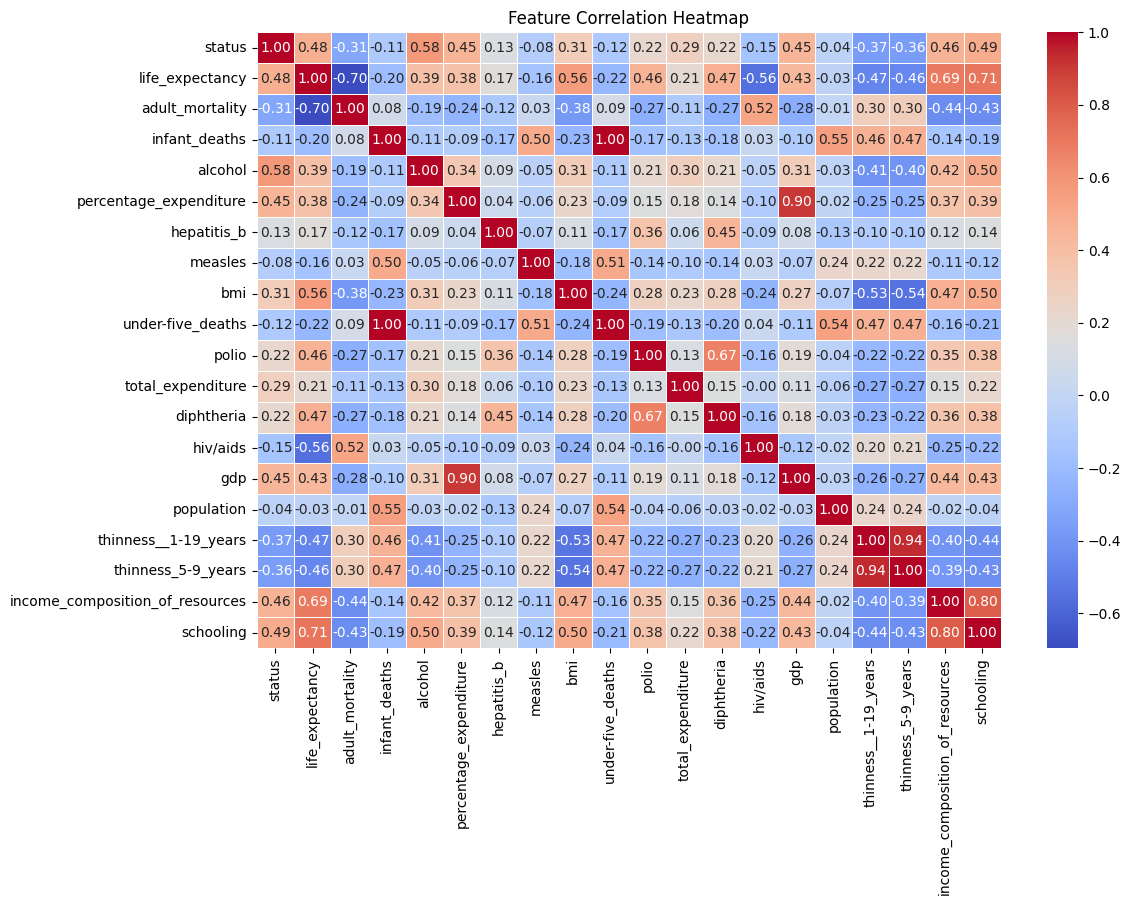


Highly Correlated Features (Threshold > 0.85):
infant_deaths ↔ under-five_deaths
percentage_expenditure ↔ gdp
thinness__1-19_years ↔ thinness_5-9_years


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Identify highly correlated features (absolute correlation > 0.85)
correlation_matrix = df.corr().abs()
high_corr_features = np.where(correlation_matrix > 0.85)
high_corr_features = [(correlation_matrix.index[x], correlation_matrix.columns[y]) 
                      for x, y in zip(*high_corr_features) if x != y and x < y]

print("\nHighly Correlated Features (Threshold > 0.85):")
for feature1, feature2 in high_corr_features:
    print(f"{feature1} ↔ {feature2}")



Selected Features by Lasso Regression:
Index(['status', 'adult_mortality', 'infant_deaths', 'alcohol',
       'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')


/var/folders/7k/g9stcr4n50s0j5zvm0j8g8qr0000gn/T/ipykernel_23206/1272997887.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lasso.coef_[lasso.coef_ != 0], y=selected_features, palette="coolwarm")


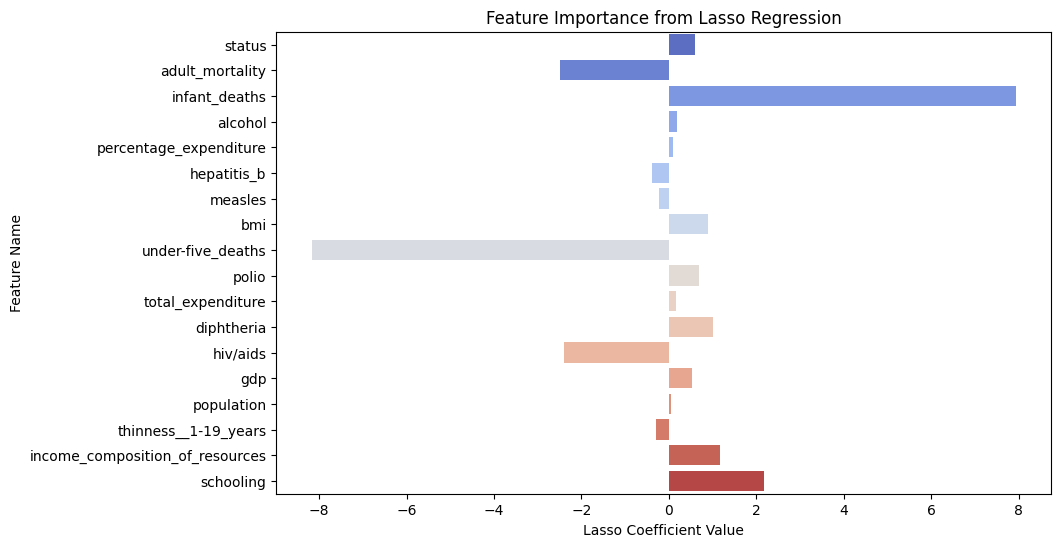

In [26]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df.drop(columns=["life_expectancy"])
y = df["life_expectancy"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lasso Regression with Cross-Validation
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y)

# Get selected features (non-zero coefficients)
selected_features = X.columns[lasso.coef_ != 0]
print("\nSelected Features by Lasso Regression:")
print(selected_features)

# Visualizing feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=lasso.coef_[lasso.coef_ != 0], y=selected_features, palette="coolwarm")
plt.xlabel("Lasso Coefficient Value")
plt.ylabel("Feature Name")
plt.title("Feature Importance from Lasso Regression")
plt.show()


# Step 3: Polynomial Regression Model Traning

In [27]:
# Define target variable
target = "life_expectancy"

# Select Features Based on Lasso Results
feature_sets = {
    "Set 1 (Health Factors)": ["adult_mortality", "infant_deaths", "hiv/aids", "bmi"],
    "Set 2 (Economic Factors)": ["gdp", "schooling", "income_composition_of_resources"],
    "Set 3 (Mixed Factors)": ["adult_mortality", "gdp", "schooling"]
}

# Split data into training and test sets
train_ratio = 0.8  # 80% train, 20% test
df_train, df_test = train_test_split(df, test_size=1-train_ratio, random_state=42)



 **Feature Set: Set 1 (Health Factors)**


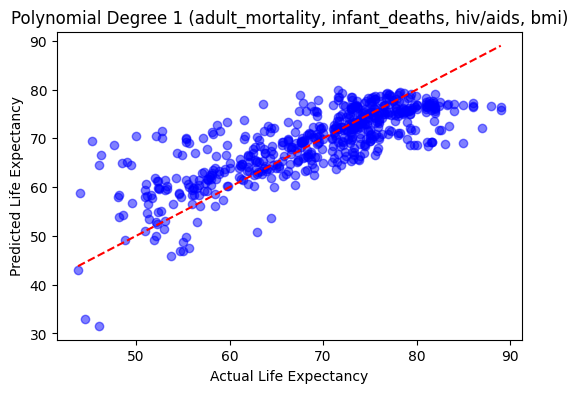

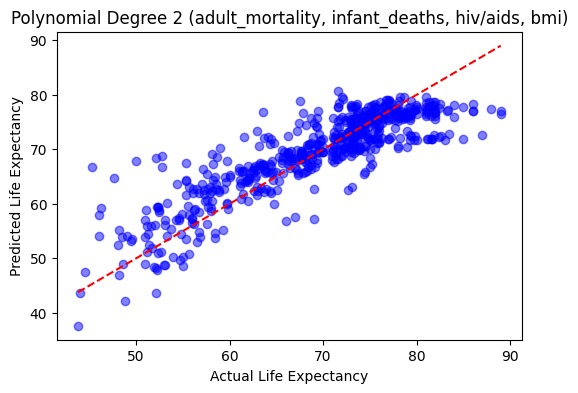

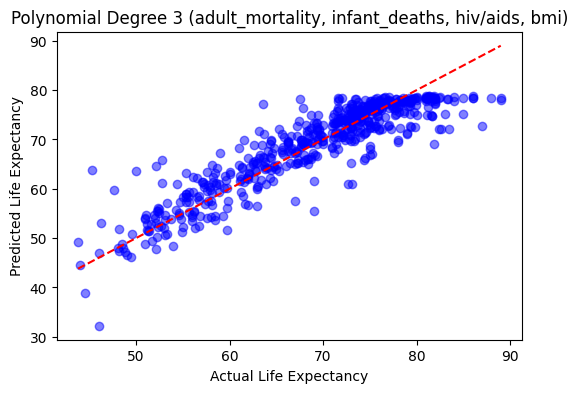

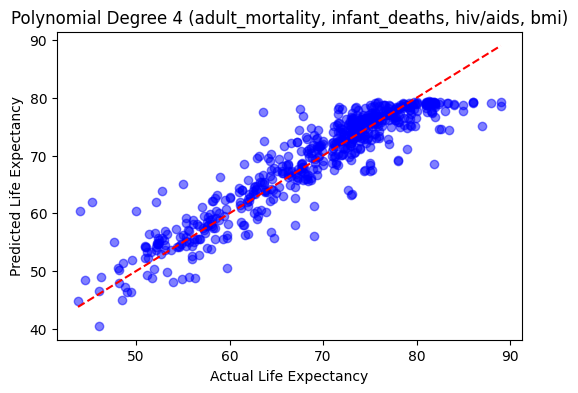

   Degree  Train RMSE  Test RMSE   R² Test
0       1    5.742701   5.749888  0.618528
1       2    4.820520   4.703728  0.744713
2       3    3.919682   3.902709  0.824258
3       4    3.470706   3.541380  0.855293

 **Feature Set: Set 2 (Economic Factors)**


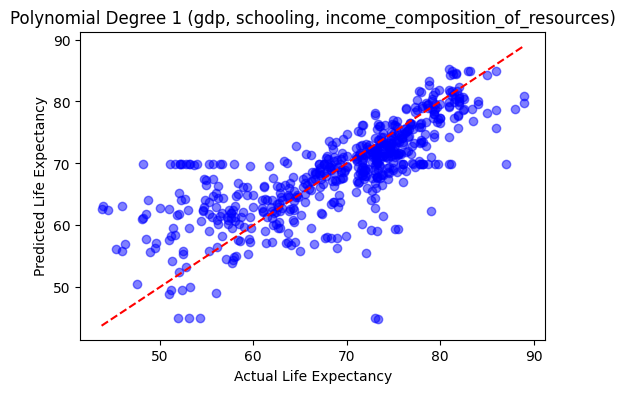

   Degree  Train RMSE  Test RMSE   R² Test
0       1    6.380881   6.037023  0.579477
1       2    5.373111   5.054462  0.705223
2       3    5.036272   4.753756  0.739254
3       4    4.910366   4.607729  0.755027

 **Feature Set: Set 3 (Mixed Factors)**


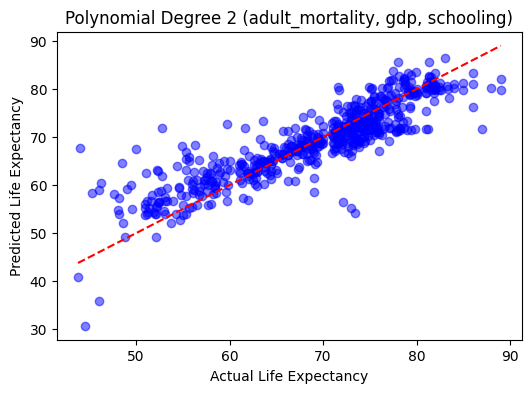

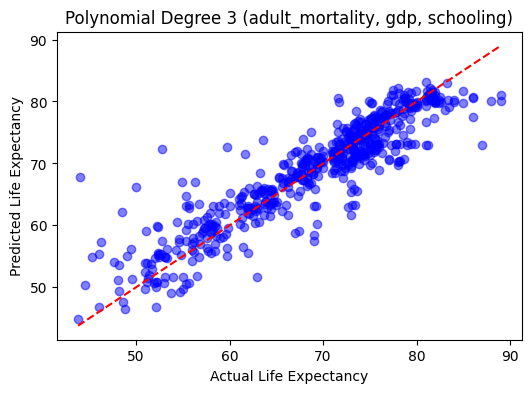

   Degree  Train RMSE  Test RMSE   R² Test
0       1    5.234763   5.072992  0.703057
1       2    4.664900   4.454375  0.771062
2       3    3.937233   3.814632  0.832100
3       4    3.818421   3.683779  0.843422


In [28]:
# Function to train polynomial regression with different feature sets & degrees
def train_polynomial_regression(feature_set, degrees=[1, 2, 3, 4]):
    X_train = df_train[feature_set]
    X_test = df_test[feature_set]
    y_train = df_train[target]
    y_test = df_test[target]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    results = []

    for degree in degrees:
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train_scaled)
        X_test_poly = poly.transform(X_test_scaled)

        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)

        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        r2_test = r2_score(y_test, y_test_pred)

        results.append({"Degree": degree, "Train RMSE": train_rmse, "Test RMSE": test_rmse, "R² Test": r2_test})

        # Plot the predictions vs actual
        plt.figure(figsize=(6, 4))
        plt.scatter(y_test, y_test_pred, color="blue", alpha=0.5)
        plt.xlabel("Actual Life Expectancy")
        plt.ylabel("Predicted Life Expectancy")
        plt.title(f"Polynomial Degree {degree} ({', '.join(feature_set)})")
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--", color="red")
        plt.show()

    return pd.DataFrame(results)

# Train models for each feature set
for set_name, features in feature_sets.items():
    print(f"\n **Feature Set: {set_name}**")
    results_df = train_polynomial_regression(features)
    print(results_df)


/Users/sajjadislam/opt/anaconda3/envs/py_312_data_mining/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


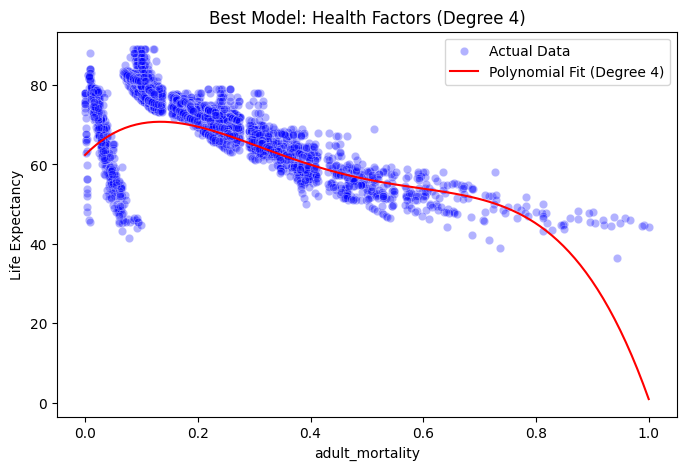

/Users/sajjadislam/opt/anaconda3/envs/py_312_data_mining/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [269]:
# Define best and worst feature sets
best_features = ["adult_mortality", "infant_deaths", "hiv/aids", "bmi"]  # Best performing feature set
worst_features = ["gdp", "schooling", "income_composition_of_resources"]  # Worst performing feature set

target = "life_expectancy"

# Function to plot polynomial relationship for a given feature set
def plot_polynomial_curve(feature_set, feature, degree, title):
    # Extract feature and target
    X = df[feature_set]
    y = df[target]

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply Polynomial Transformation
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_scaled)

    # Train Polynomial Regression Model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Generate range for a single feature
    X_range = np.linspace(df[feature].min(), df[feature].max(), 100).reshape(-1, 1)

    # Standardize X_range with mean from training set
    X_range_scaled = scaler.transform(np.column_stack([
        np.full(100, df[f].mean()) if f != feature else X_range.ravel() for f in feature_set
    ]))

    # Transform using Polynomial Features
    X_range_poly = poly.transform(X_range_scaled)

    # Predict Life Expectancy
    y_pred = model.predict(X_range_poly)

    # Plot the polynomial curve
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[feature], y=df[target], alpha=0.3, label="Actual Data", color="blue")
    plt.plot(X_range, y_pred, color="red", label=f"Polynomial Fit (Degree {degree})")
    plt.xlabel(feature)
    plt.ylabel("Life Expectancy")
    plt.title(title)
    plt.legend()
    plt.show()

# Plot for Best Model (Health Factors, Degree 4)
plot_polynomial_curve(best_features, "adult_mortality", 4, "Best Model: Health Factors (Degree 4)")

# Plot for Worst Model (Economic Factors, Degree 1)
plot_polynomial_curve(worst_features, "gdp", 1, "Worst Model: Economic Factors (Degree 1)")

# Step 4: Explore Regression Splines 

In [29]:
# Select the feature for spline regression
feature = "adult_mortality"
target = "life_expectancy"

X = df[[feature]]
y = df[target]

# Generate an evenly spaced range for plotting the spline
X_range = np.linspace(X.min(), X.max(), 100)



Selected Normalized Knot Values: [0.10110803 0.19806094 0.31301939]


/var/folders/7k/g9stcr4n50s0j5zvm0j8g8qr0000gn/T/ipykernel_23206/932789424.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = scaler.fit_transform(X[[feature]])  # Apply normalization


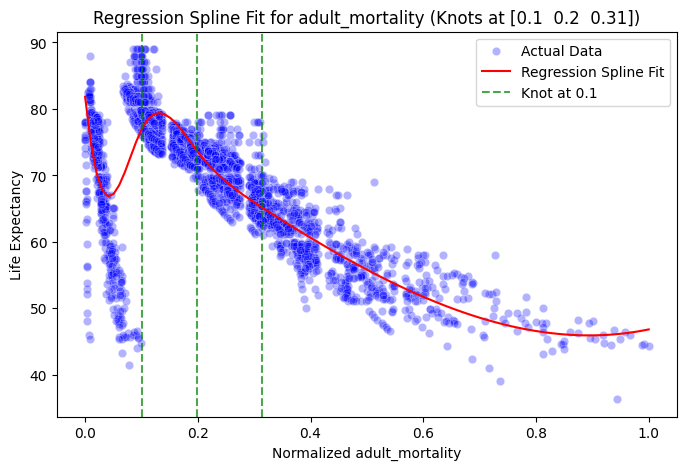

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# Normalize feature values
scaler = MinMaxScaler()
X[feature] = scaler.fit_transform(X[[feature]])  # Apply normalization

# Define knots using quantiles (ensures knots are within 0-1 range)
knots_normalized = np.quantile(X[feature], [0.25, 0.5, 0.75])  # Example: 25th, 50th, 75th percentiles

print("\nSelected Normalized Knot Values:", knots_normalized)

# Create B-Spline Basis using normalized knots
X_spline = dmatrix(
    "bs(x, knots=knots_normalized, degree=3, include_intercept=True)", 
    {"x": X[feature]}, return_type="dataframe"
)

# Train Regression Spline Model
spline_model = LinearRegression()
spline_model.fit(X_spline, y)

# Generate X_range for predictions (ensure it's scaled correctly)
X_range_scaled = np.linspace(X[feature].min(), X[feature].max(), 100).reshape(-1, 1)

# Transform X_range using B-Spline Basis
X_range_spline = dmatrix(
    "bs(x, knots=knots_normalized, degree=3, include_intercept=True)", 
    {"x": X_range_scaled.ravel()}, return_type="dataframe"
)

# Predict Life Expectancy
y_pred = spline_model.predict(X_range_spline)

# Plot the Spline Fit with Knots
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X[feature], y=y, alpha=0.3, label="Actual Data", color="blue")
plt.plot(X_range_scaled, y_pred, color="red", label="Regression Spline Fit")

# Add vertical lines at knots (avoiding duplicate labels)
for i, knot in enumerate(knots_normalized):
    plt.axvline(x=knot, color='green', linestyle='--', alpha=0.7, label=f'Knot at {round(knot, 2)}' if i == 0 else "_nolegend_")

plt.xlabel(f"Normalized {feature}")
plt.ylabel("Life Expectancy")
plt.title(f"Regression Spline Fit for {feature} (Knots at {knots_normalized.round(2)})")
plt.legend()
plt.show()


In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from patsy import dmatrix
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Normalize feature values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X[[feature]])  # Normalize the feature

# Function to evaluate splines with different knots
def evaluate_splines(knots_percentiles_list):
    results = []
    
    for percentiles in knots_percentiles_list:
        # Compute knots from percentiles
        knots_normalized = np.percentile(X_scaled, percentiles)

        # Ensure knots are unique and within valid range (0,1)
        knots_normalized = np.unique(knots_normalized)
        knots_normalized = knots_normalized[(knots_normalized > 0) & (knots_normalized < 1)]
        
        if len(knots_normalized) < 1:  # If all knots are invalid, skip this set
            print(f"Skipping knots at percentiles {percentiles} (out of range).")
            continue
        
        # Create B-Spline Basis
        X_spline = dmatrix(
            "bs(x, knots=knots_normalized, degree=3, include_intercept=True)", 
            {"x": X_scaled.ravel()}, return_type="dataframe"
        )

        # Train Regression Spline Model
        model = LinearRegression()
        model.fit(X_spline, y)

        # Predict values
        y_pred = model.predict(X_spline)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Store results
        results.append({"Knot Percentiles": percentiles, "Normalized Knots": knots_normalized.tolist(), "RMSE": rmse})

    return pd.DataFrame(results)

# Define knots using percentiles instead of absolute values
knots_percentiles_options = [[25, 50, 75], [10, 50, 90], [5, 25, 75, 95]]  # Example: Selecting quartiles

# Evaluate splines with different knot percentiles
results_df = evaluate_splines(knots_percentiles_options)

# Display results
from IPython.display import display
display(results_df)


Knot Percentiles                                   Normalized Knots  \
0     [25, 50, 75]  [0.10110803324099724, 0.19806094182825487, 0.3...   
1     [10, 50, 90]  [0.02493074792243767, 0.19806094182825487, 0.4...   
2  [5, 25, 75, 95]  [0.01662049861495845, 0.10110803324099724, 0.3...   

       RMSE  
0  5.393641  
1  5.916888  
2  5.642920


Normalized Best Knot Values: []


/var/folders/7k/g9stcr4n50s0j5zvm0j8g8qr0000gn/T/ipykernel_23206/911945025.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = X_scaled  # Update X with normalized feature values
/opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


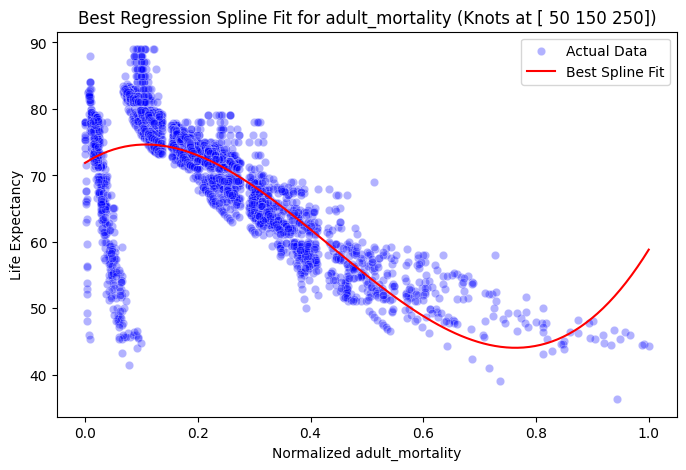

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# Normalize feature values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X[[feature]])  # Keep original X unchanged
X[feature] = X_scaled  # Update X with normalized feature values

# Define best knots in original scale
best_knots_original = np.array([50, 150, 250])

# Transform knots to normalized scale
best_knots_normalized = scaler.transform(best_knots_original.reshape(-1, 1)).flatten()

# Ensure knots are within valid range
best_knots_normalized = best_knots_normalized[(best_knots_normalized > 0) & (best_knots_normalized < 1)]

print("\nNormalized Best Knot Values:", best_knots_normalized)

# Create B-Spline Basis using normalized best knots
X_spline_best = dmatrix(
    "bs(x, knots=best_knots_normalized, degree=3, include_intercept=True)", 
    {"x": X[feature]}, return_type="dataframe"
)

# Train Regression Spline Model
spline_model_best = LinearRegression()
spline_model_best.fit(X_spline_best, y)

# Generate X_range for predictions (ensure it's scaled correctly)
X_range_scaled = np.linspace(X[feature].min(), X[feature].max(), 100).reshape(-1, 1)

# Transform X_range using B-Spline Basis
X_range_spline_best = dmatrix(
    "bs(x, knots=best_knots_normalized, degree=3, include_intercept=True)", 
    {"x": X_range_scaled.ravel()}, return_type="dataframe"
)

# Predict Life Expectancy
y_pred_best = spline_model_best.predict(X_range_spline_best)

# Plot the Best Spline Fit with Knots
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X[feature], y=y, alpha=0.3, label="Actual Data", color="blue")
plt.plot(X_range_scaled, y_pred_best, color="red", label="Best Spline Fit")

# Add vertical lines at knots (avoiding duplicate labels)
for i, knot in enumerate(best_knots_normalized):
    plt.axvline(x=knot, color='green', linestyle='--', alpha=0.7, label=f'Knot at {best_knots_original[i]}' if i == 0 else "_nolegend_")

plt.xlabel(f"Normalized {feature}")
plt.ylabel("Life Expectancy")
plt.title(f"Best Regression Spline Fit for {feature} (Knots at {best_knots_original})")
plt.legend()
plt.show()


Is Regression Splines Necessary?

Based on the RMSE results, Regression Splines are not significantly improving model performance compared to Polynomial Regression.

Key Observations

- Polynomial Regression (Degree 4, Health Factors) performs best → Lowest RMSE = 3.54

- Regression Splines did not improve RMSE (Best RMSE = 5.46) → It still underperforms.

- Splines work best when there are clear breakpoints in the data → But life expectancy appears to follow a smooth continuous trend, making Polynomial Regression a better fit.